In [304]:
%matplotlib inline
import pandas_profiling
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [18, 6]
import pandas
pandas.options.display.max_columns = 999
from datetime import datetime

In [305]:
now = pandas.Timestamp(datetime.now())

In [306]:
df = pandas.read_csv("../results.csv", parse_dates=[0,10])

In [307]:
pandas_profiling.ProfileReport(df)

Number of variables,29
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,103.6 KiB
Average record size in memory,106.1 B
Numeric,13
Categorical,4
Date,2
Text (Unique),1
Rejected,9
Distinct count,2


In [308]:
df.dtypes


last_updated          datetime64[ns]
github_link                   object
user                          object
project_name                  object
app_id                        object
category                      object
stars                          int64
contributors                   int64
commits                        int64
forks                          int64
created_at            datetime64[ns]
androidviewclient               bool
appium                          bool
calabash                        bool
espresso                        bool
monkeyrunner                    bool
pythonuiautomator               bool
robotium                        bool
uiautomator                     bool
projectquantum                  bool
qmetry                          bool
saucelabs                       bool
firebase                        bool
perfecto                        bool
bitbar                          bool
junit                           bool
androidjunitrunner              bool
r

In [309]:
ui_automation_frameworks = [
    "androidviewclient",
    'appium',
    'calabash',
    'espresso',
    'monkeyrunner',
    'pythonuiautomator',
    'robotium',
    'uiautomator',
]

cloud_test_services = [
    'projectquantum',
    'qmetry',
    'saucelabs',
    'firebase',
    'perfecto',
    'bitbar',
]

unit_test_frameworks = [
    'junit',
    'androidjunitrunner',
    'roboelectric',
    'robospock',
]

# Projects with tests

In [310]:
df['tests'] = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].any(axis=1)
projects_with_tests = df['tests'].sum()
total_projects = len(df.index)
print("{} out of {} projects ({:.0%}).".format(projects_with_tests, total_projects, projects_with_tests/total_projects))

406 out of 1000 projects (41%).


# Projects with unit tests

In [311]:
projects_with_unit_tests = df[unit_test_frameworks].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_unit_tests, total_projects, projects_with_tests/total_projects))

392 out of 1000 projects (41%).


# Projects using UI tests

In [312]:
df['ui_tests'] = df[ui_automation_frameworks].apply(any, axis=1)
projects_with_ui_tests = df['ui_tests'].sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_ui_tests, total_projects, projects_with_tests/total_projects))


154 out of 1000 projects (41%).


# Projects using cloud test services

In [313]:
projects_with_cloud_tests = df[cloud_test_services].apply(any, axis=1).sum()
print("{} out of {} projects ({:.0%}).".format(projects_with_cloud_tests, total_projects, projects_with_tests/total_projects))


29 out of 1000 projects (41%).


# Number of projects by framework

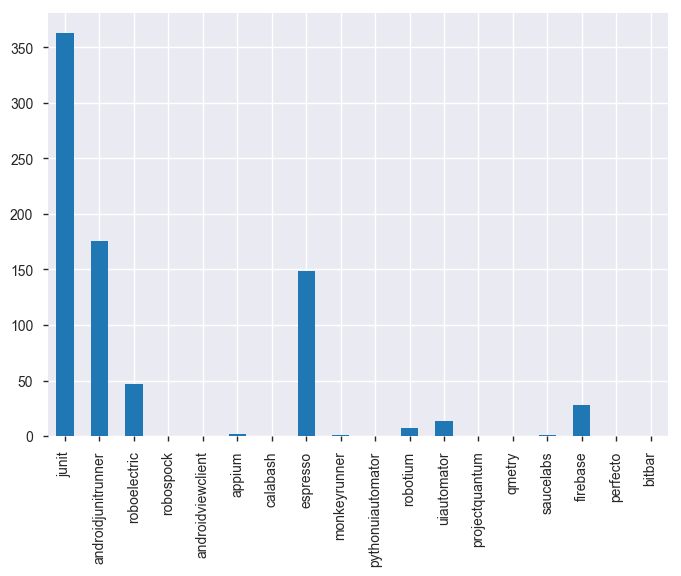

In [314]:
# f, (ax1, ax2) = plt.subplots(1, 2)
# pie = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='pie', ax=ax1)
bar = df[unit_test_frameworks+ui_automation_frameworks+cloud_test_services].sum().plot(kind='bar')

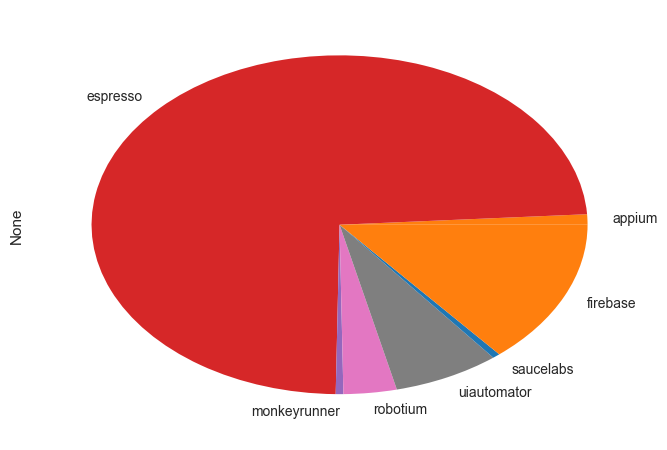

In [315]:
pie = df[ui_automation_frameworks+cloud_test_services].sum().plot(kind='pie')


In [316]:
df['age'] = (now - df['created_at'])
df['age_numeric'] = (now - df['created_at']).astype('<m8[Y]').astype('int')
df['time_since_last_update'] = (now - df['last_updated'])
df['time_since_last_update_numeric'] = df['time_since_last_update'].astype('<m8[Y]').astype('int')

# Distribution of Age

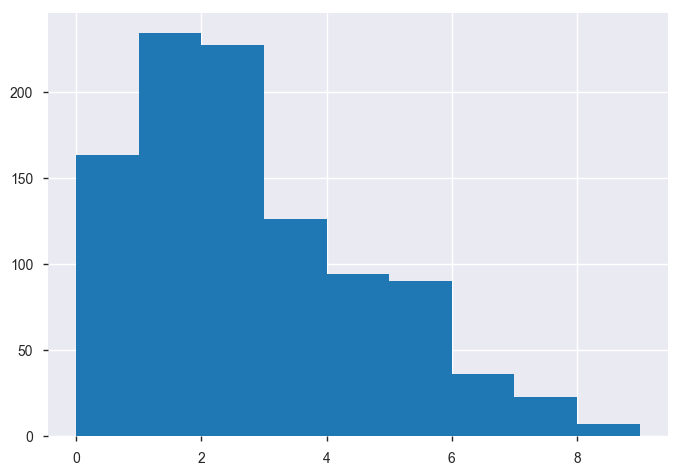

In [317]:
df['age_numeric'].hist(bins=9)

In [42]:
df['age'].describe()

count                         1000
mean     1028 days 11:37:03.972600
std       673 days 11:56:35.891598
min        27 days 11:18:20.772600
25%       524 days 05:18:20.772600
50%       897 days 11:18:20.772600
75%      1451 days 11:18:20.772600
max      3328 days 11:18:20.772600
Name: age, dtype: object

# Tests in projects by time since creation

In [137]:
def tests_in_projects_by_time_of_creation(df_projects, frameworks, label=None,
                                          title="Portion of projects with tests by age",
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['age_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['age_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['age_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(age_max), portions, label=label)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1')
    ax = plt.gca()
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        plt.title(title)

In [124]:
df[df['age_numeric']==df['age_numeric'].max()]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,age,age_numeric,time_since_last_update
921,2015-09-17,https://github.com/dbravender/korean_conjugation,dbravender,korean_conjugation,us.bravender.android.dongsa,Science & Education,43,2,572,15,2008-07-26,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3328 days 11:18:20.772600,9,719 days 11:18:20.772600


Age 0:
107 out of 165 projects (64.8%).
Age 1:
136 out of 233 projects (58.4%).
Age 2:
56 out of 228 projects (24.6%).
Age 3:
34 out of 125 projects (27.2%).
Age 4:
28 out of 95 projects (29.5%).
Age 5:
30 out of 89 projects (33.7%).
Age 6:
10 out of 35 projects (28.6%).
Age 7:
4 out of 23 projects (17.4%).
Age 8:
1 out of 6 projects (16.7%).
Age 9:
0 out of 1 projects (0.0%).


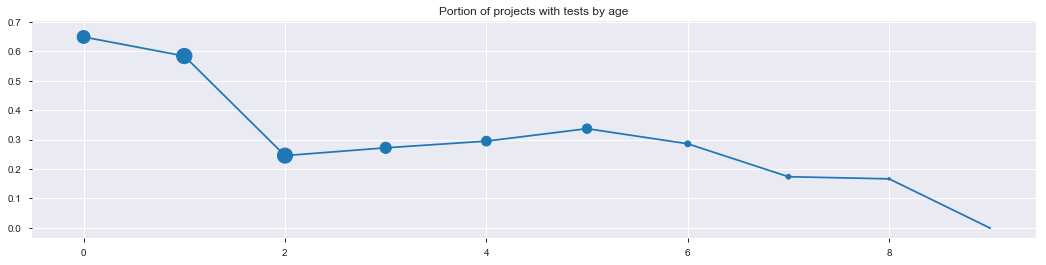

In [125]:
tests_in_projects_by_time_of_creation(df, unit_test_frameworks+ui_automation_frameworks+cloud_test_services,
                                      verbose=True)

In [46]:
((df['age'].dt.total_seconds()/3600/24/365)<1).sum()

165

# Active projects

**Projects that had an update in the last year**

In [127]:
df_active = df[df['time_since_last_update'].dt.total_seconds()/(3600*24*365) < 1]
print("Total projects updated within last year: {}.".format(len(df_active.index)))


Total projects updated within last year: 677.


# Tests in projects by time since creation (only for active projects)

Only considered projects that had an update in the last year.

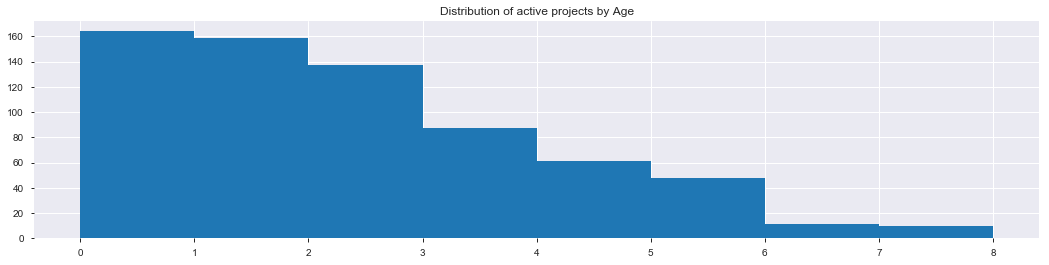

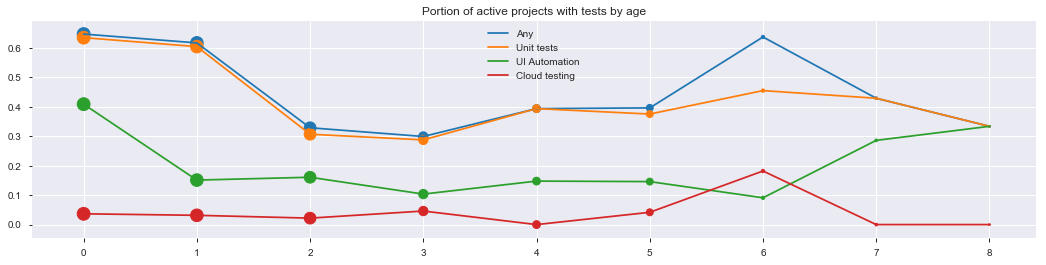

In [128]:
plt.title("Distribution of active projects by Age")
df_active.age_numeric.hist(bins=8)
# fig, (ax1, ax2, ax3) = plt.subplots(1,3)
plt.figure()
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks+ui_automation_frameworks+cloud_test_services, label="Any")
tests_in_projects_by_time_of_creation(df_active, unit_test_frameworks, label="Unit tests")
tests_in_projects_by_time_of_creation(df_active, ui_automation_frameworks, label="UI Automation")
tests_in_projects_by_time_of_creation(df_active, cloud_test_services, label="Cloud testing")
plt.title("Portion of active projects with tests by age")

# Projects that use cloud testing services

In [129]:
df_cloud = df[df[cloud_test_services].any(axis='columns')]

In [130]:
print("Total projects using cloud services: {}".format(len(df_cloud)))

Total projects using cloud services: 29


### Projects that use cloud services but no other test framework: 

In [131]:
df_cloud_wo_ui = df_cloud[ui_automation_frameworks+unit_test_frameworks].any(axis=1)==False
print("Total Projects: {}".format(df_cloud_wo_ui.sum()))
df_cloud[df_cloud_wo_ui]

Total Projects: 8


,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,age,age_numeric,time_since_last_update
69,2017-08-15,https://github.com/osmandapp/Osmand,osmandapp,Osmand,net.osmand.plus,Navigation,1187,337,41403,574,2011-01-15,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2425 days 11:18:20.772600,6,21 days 11:18:20.772600
79,2017-08-14,https://github.com/vector-im/riot-android,vector-im,riot-android,im.vector.alpha,Internet,423,49,3556,147,2015-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,628 days 11:18:20.772600,1,22 days 11:18:20.772600
175,2017-07-14,https://github.com/romannurik/muzei,romannurik,muzei,net.nurik.roman.muzei,Multimedia,3277,19,1041,809,2014-02-06,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1307 days 11:18:20.772600,3,53 days 11:18:20.772600
193,2017-07-09,https://github.com/michaelkourlas/voipms-sms-c...,michaelkourlas,voipms-sms-client,net.kourlas.voipms_sms,Phone & SMS,67,2,231,26,2014-09-20,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1081 days 11:18:20.772600,2,58 days 11:18:20.772600
573,2016-11-21,https://github.com/khertan/ForRunners,khertan,ForRunners,net.khertan.forrunners,Sports & Health,38,5,182,19,2015-10-10,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,696 days 11:18:20.772600,1,288 days 11:18:20.772600
644,2016-10-04,https://github.com/ybonnel/TransportsRennes,ybonnel,TransportsRennes,fr.ybo.transportsbordeaux,Navigation,42,3,1291,15,2010-12-17,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,2454 days 11:18:20.772600,6,336 days 11:18:20.772600
698,2016-08-06,https://github.com/M66B/NetGuard,M66B,NetGuard,eu.faircode.netguard,Security,1149,25,3012,271,2015-10-24,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,682 days 11:18:20.772600,1,395 days 11:18:20.772600
718,2016-07-08,https://github.com/Andre1299/TUI-ConsoleLauncher,Andre1299,TUI-ConsoleLauncher,ohi.andre.consolelauncher,System,209,2,123,63,2016-05-11,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,482 days 11:18:20.772600,1,424 days 11:18:20.772600



# Projects that started 2 years ago by date time since last update

In [150]:
df_old = df[df['age_numeric']>=2]

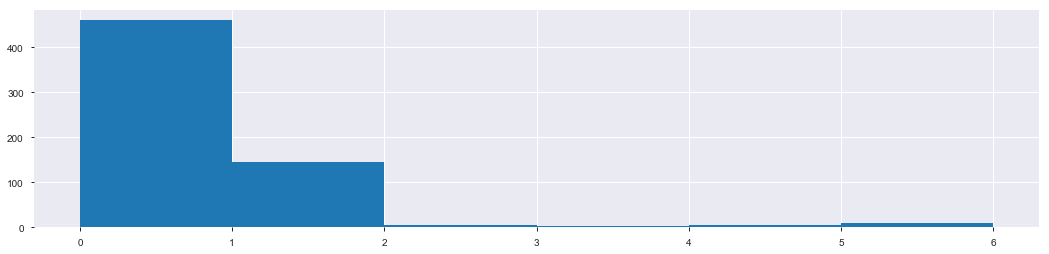

In [151]:
df_old['time_since_last_update_numeric'].hist(bins=6)

In [155]:
def tests_in_projects_by_time_of_update(df_projects, frameworks, label=None,
                                          title="Portion of projects with tests by time since last update",
                                          verbose=False):
    portions = []
    n_projects_with_tests_history = []
    total_projects_history = []
    age_max = df_projects['time_since_last_update_numeric'].max()+1
    for age in range(age_max):
        n_projects_with_tests = df_projects[df_projects['time_since_last_update_numeric']==age][frameworks].apply(any, axis=1).sum()
        n_projects_with_tests_history.append(n_projects_with_tests)
        total_projects = len(df_projects[df_projects['time_since_last_update_numeric']==age].index)
        total_projects_history.append(total_projects)
        if total_projects == 0:
            portion = 0
        else:
            portion = n_projects_with_tests/total_projects
        portions.append(portion)
        if verbose:
            print("Age {}:".format(age))
            print("{} out of {} projects ({:.1%}).".format(n_projects_with_tests, total_projects, portion))
    
    plt.plot(range(age_max), portions, label=label)
    plt.scatter(range(age_max), portions, total_projects_history, marker='o', linewidth='1')
    ax = plt.gca()
    if label:
        legend = ax.legend(loc='upper center', shadow=True)
    if title:
        plt.title(title)

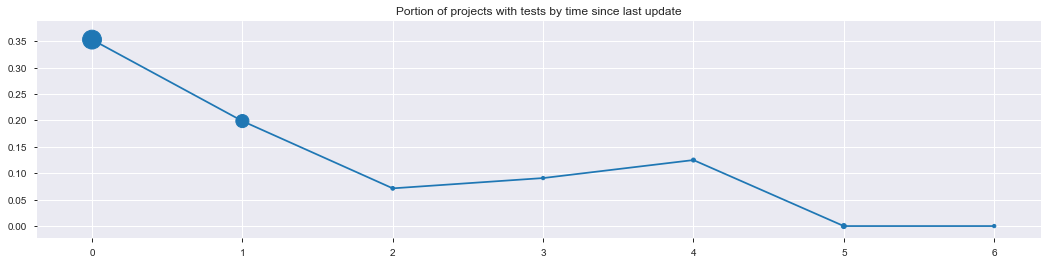

In [156]:
tests_in_projects_by_time_of_update(df_old, unit_test_frameworks+ui_automation_frameworks+cloud_test_services)

# Analysis of the impact of having tests in a project

In [318]:
df[['stars','forks']].describe()

,stars,forks
count,1000.000000,1000.000000
mean,145.281000,53.854000
std,608.915605,249.030032
min,0.000000,0.000000
25%,6.000000,3.000000
50%,20.000000,9.000000
75%,68.000000,30.000000
max,15159.000000,6721.000000


In [319]:
df[(df['stars']> 5000)]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,tests,ui_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
929,2015-02-16,https://github.com/zxing/zxing,zxing,zxing,com.google.zxing.client.android,Multimedia,15159,71,3362,6721,2011-10-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2157 days 11:19:16.927307,5,934 days 11:19:16.927307,2


In [320]:
abs((df.stars.mean()-df.iloc[929].stars)/df.stars.std())

24.656485844415137

There is clearly an outlier with 15159 stars and 6721.
It deviates from the mean ___24.7___ standard deviations.

It is the _zxing_ project which is a library for barcode scanning in Java or Android.
The repo has several modules (e.g., library's code, website, Java clients) including a small Android app.
The projects has tests although the Android app doesn't. Since the metrics from github are significantly different and are not representative of the app we are excluding it from this part of analysis.


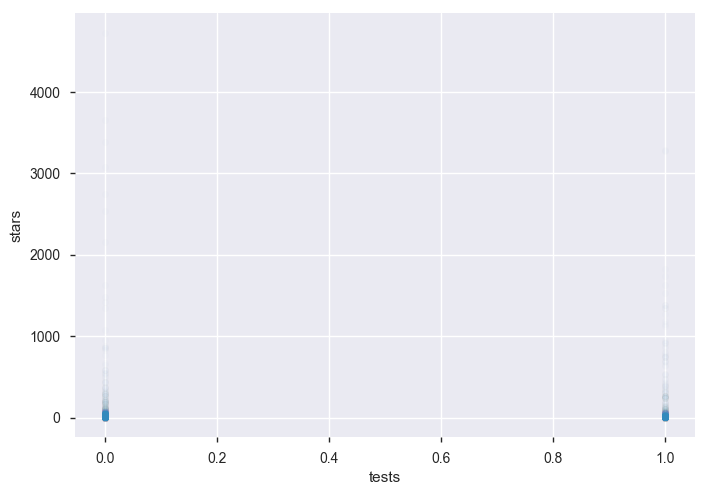

In [321]:
df_tmp.plot.scatter('tests','stars', alpha=0.01)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ac135c0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e78b908>]], dtype=object)

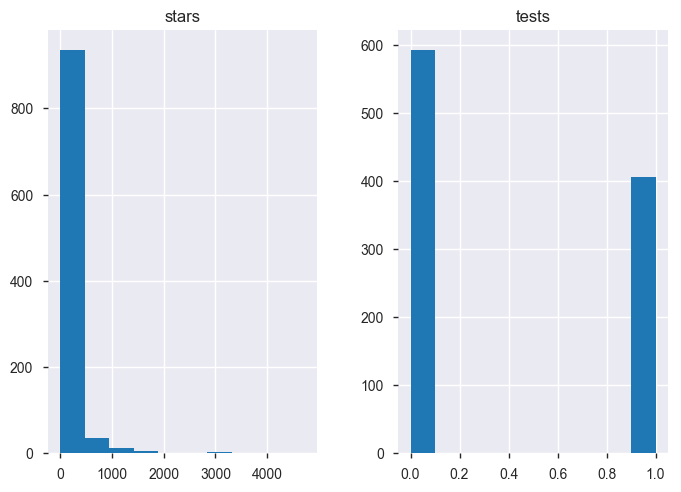

In [322]:
df_tmp[['stars','tests']].hist()

<Container object of 10 artists>

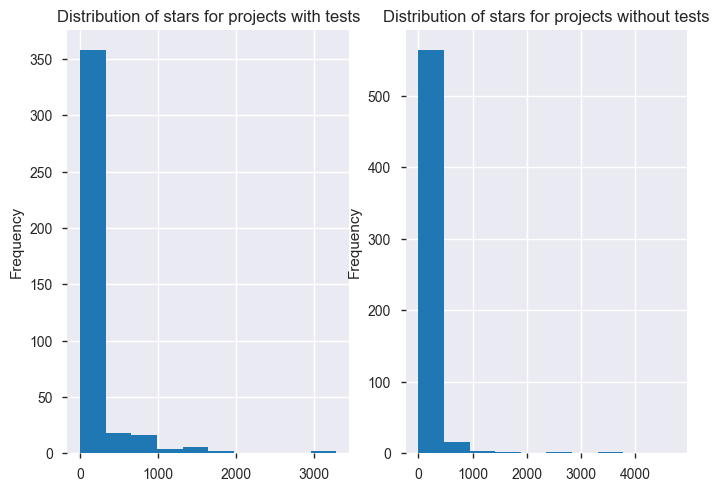

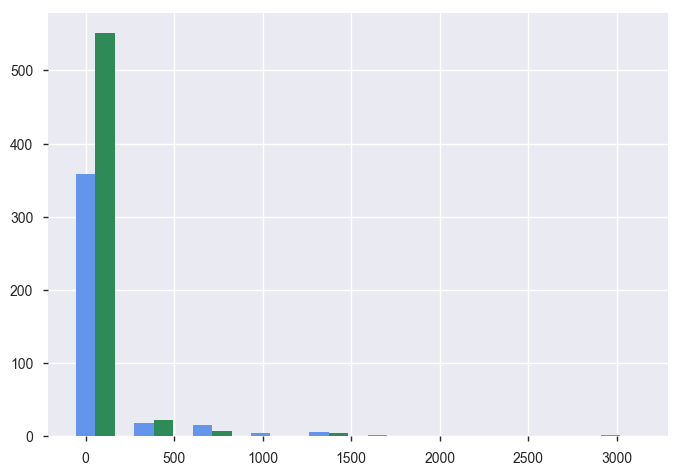

In [323]:
_,(ax1,ax2) = plt.subplots(1,2)
df_tmp[df_tmp['tests']]['stars'].plot.hist(ax=ax1)
ax1.set_title("Distribution of stars for projects with tests")
df_tmp[~df_tmp['tests']]['stars'].plot.hist(ax=ax2)
ax2.set_title("Distribution of stars for projects without tests")
plt.figure()

fig, ax = plt.subplots()

import numpy as np
a_heights, a_bins = np.histogram(df_tmp[df_tmp['tests']]['stars'])
b_heights, b_bins = np.histogram(df_tmp[~df_tmp['tests']]['stars'], bins=a_bins)
width = (a_bins[1] - a_bins[0])/3

ax.bar(a_bins[:-1], a_heights, width=width, facecolor='cornflowerblue')
ax.bar(b_bins[:-1]+width, b_heights, width=width, facecolor='seagreen')

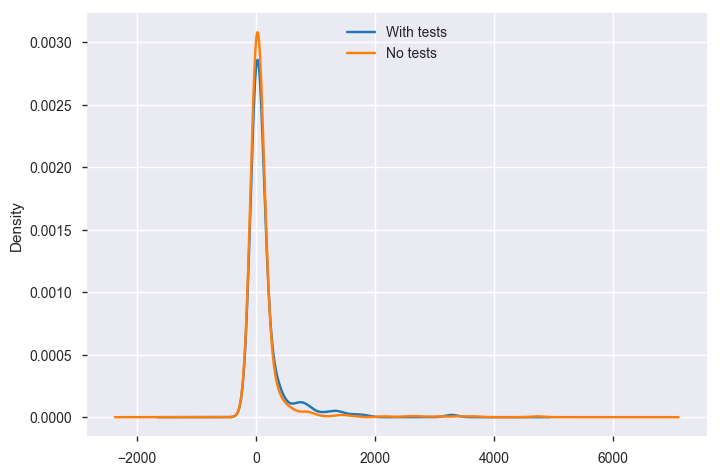

In [324]:
fig, ax = plt.subplots()
df_tmp[df_tmp['tests']]['stars'].plot.kde(label='With tests')
df_tmp[~df_tmp['tests']]['stars'].plot.kde(label='No tests')
ax.legend(loc='upper center', shadow=True)

In [325]:
from statsmodels.graphics.boxplots import violinplot, beanplot

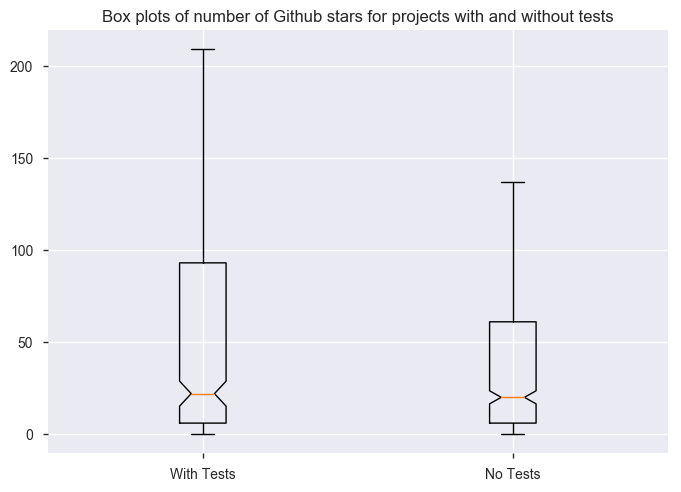

In [326]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['stars'].values,df_tmp[~df_tmp['tests']]['stars'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github stars for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

In [327]:
df_tmp = df[df['stars']<10000]
df_tmp[df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,406.000000,406.000000
mean,150.216749,54.514778
std,364.204219,144.958073
min,0.000000,0.000000
25%,6.000000,3.000000
50%,22.000000,9.000000
75%,93.000000,36.000000
max,3294.000000,1815.000000


In [328]:
df_tmp[~df_tmp['tests']][['stars','forks']].describe()

,stars,forks
count,593.000000,593.000000
mean,116.583474,42.158516
std,391.584433,122.692300
min,0.000000,0.000000
25%,6.000000,3.000000
50%,20.000000,9.000000
75%,61.000000,25.000000
max,4731.000000,1091.000000


### cobntributors

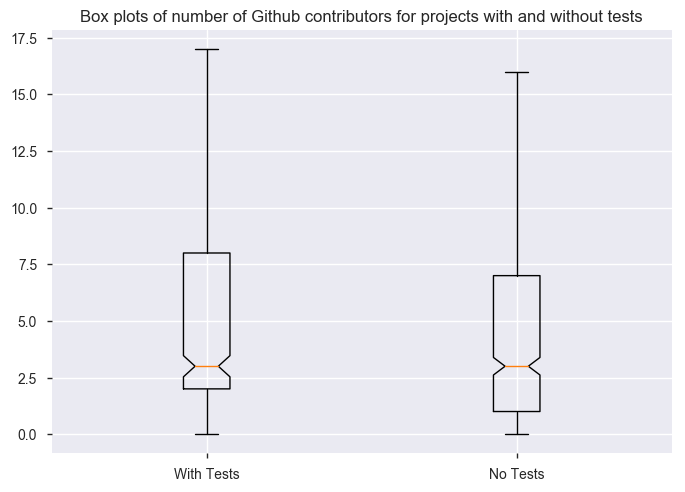

In [329]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['contributors'].values,df_tmp[~df_tmp['tests']]['contributors'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github contributors for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Activity/Contributions/Commits

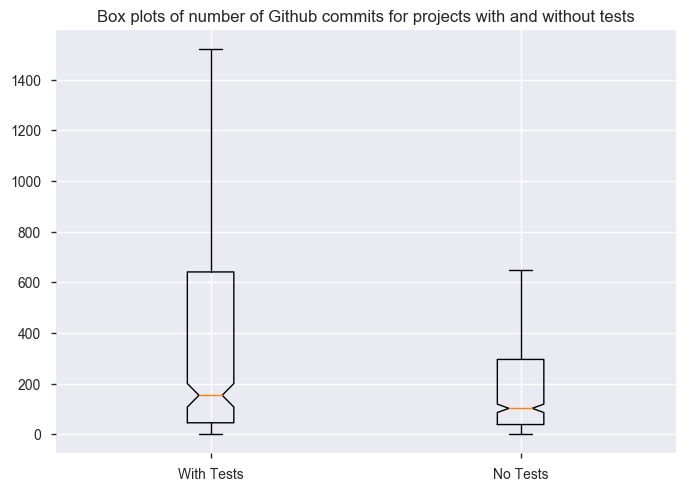

In [330]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['commits'].values,df_tmp[~df_tmp['tests']]['commits'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github commits for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

### Forks

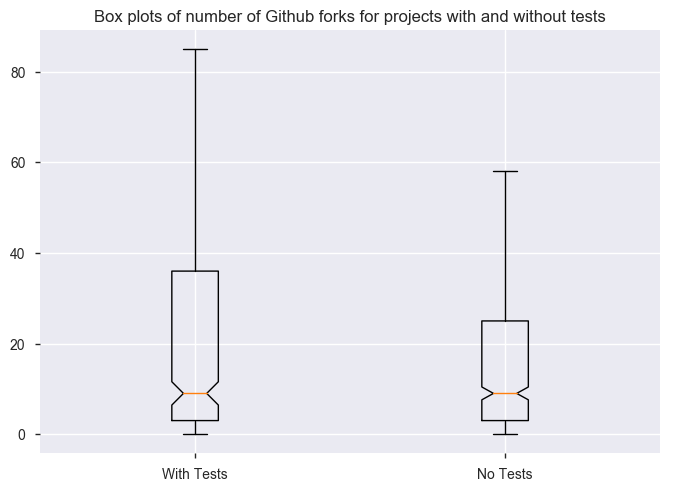

In [331]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['tests']]['forks'].values,df_tmp[~df_tmp['tests']]['forks'].values],
    labels=["With Tests", "No Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Box plots of number of Github forks for projects with and without tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

# Analysis of the impact of having UI tests in a project

## Stars vs UI Tests

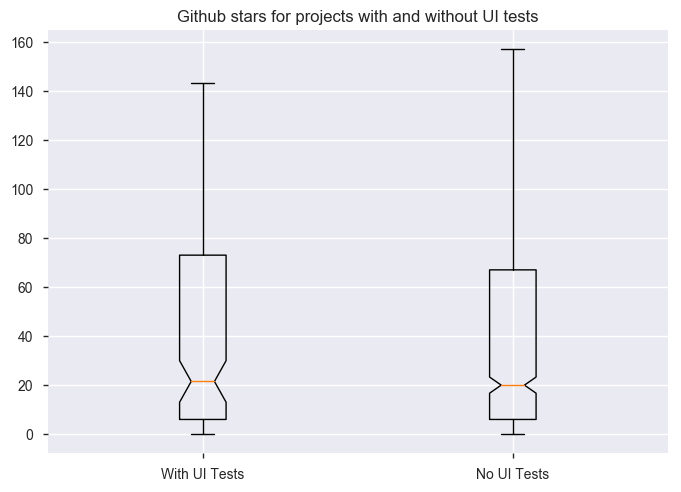

In [343]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['stars'].values,df_tmp[~df_tmp['ui_tests']]['stars'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Github stars for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

## Contributors vs UI Tests

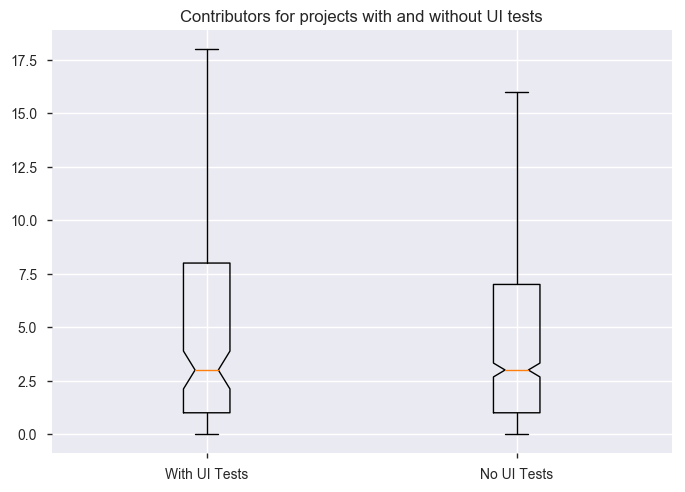

In [344]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['contributors'].values,df_tmp[~df_tmp['ui_tests']]['contributors'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Contributors for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

## Commits vs UI Tests


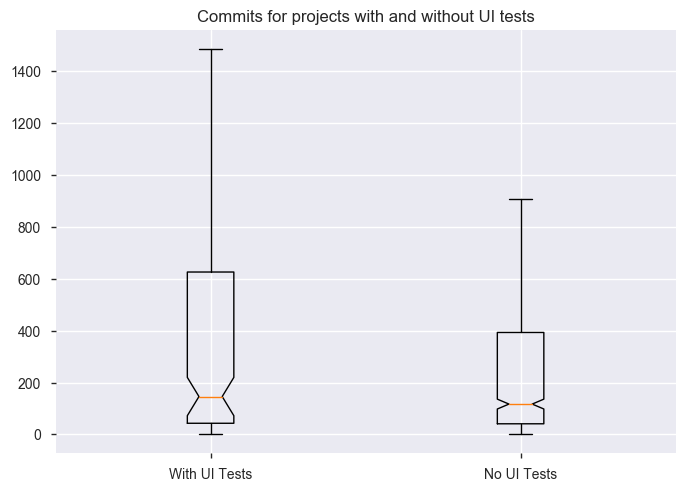

In [345]:
_,ax = plt.subplots()
ax.boxplot(
    [df_tmp[df_tmp['ui_tests']]['commits'].values,df_tmp[~df_tmp['ui_tests']]['commits'].values],
    labels=["With UI Tests", "No UI Tests"],
    notch=True,
    sym='',
    meanline =True,
)
ax.set_title("Commits for projects with and without UI tests")
# notches are calculated using a Gaussian-based asymptotic approximation
# (see McGill, R., Tukey, J.W., and Larsen, W.A., 1978, and Kendall and Stuart, 1967)

# Analyze popular projects without tests

In [353]:
df_tmp[~df_tmp['tests']].sort_values('stars', ascending=False)

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,tests,ui_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
290,2017-05-20,https://github.com/samuelclay/NewsBlur,samuelclay,NewsBlur,com.newsblur,Reading,4731,66,11832,860,2009-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,3167 days 11:19:16.927307,8,110 days 11:19:16.927307,0
896,2015-11-17,https://github.com/dolphin-emu/dolphin,dolphin-emu,dolphin,org.dolphinemu.dolphinemu,Games,3662,294,25821,920,2013-07-22,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1508 days 11:19:16.927307,4,660 days 11:19:16.927307,1
602,2016-11-02,https://github.com/naman14/Timber,naman14,Timber,naman14.timber,Multimedia,3391,26,467,1031,2015-06-12,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,818 days 11:19:16.927307,2,309 days 11:19:16.927307,0
898,2015-11-15,https://github.com/hrydgard/ppsspp,hrydgard,ppsspp,org.ppsspp.ppsspp,Games,3085,207,22653,1091,2012-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1771 days 11:19:16.927307,4,662 days 11:19:16.927307,1
517,2016-12-30,https://github.com/minetest/minetest,minetest,minetest,net.minetest.minetest,Games,2742,322,6957,822,2011-08-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2223 days 11:19:16.927307,6,251 days 11:19:16.927307,0
15,2017-08-24,https://github.com/siacs/Conversations,siacs,Conversations,eu.siacs.conversations,Internet,2535,87,4311,834,2014-01-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1322 days 11:19:16.927307,3,14 days 11:19:16.927307,0
393,2017-03-26,https://github.com/jonan/ForkHub,jonan,ForkHub,jp.forkhub,Development,2159,94,2831,166,2014-10-16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1057 days 11:19:16.927307,2,165 days 11:19:16.927307,0
165,2017-07-18,https://github.com/jackpal/Android-Terminal-Em...,jackpal,Android-Terminal-Emulator,jackpal.androidterm,Development,1624,65,1038,653,2010-09-04,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2560 days 11:19:16.927307,7,51 days 11:19:16.927307,0
304,2017-05-15,https://github.com/redsolution/xabber-android,redsolution,xabber-android,com.xabber.androiddev,Internet,1484,14,2022,792,2013-01-29,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1682 days 11:19:16.927307,4,115 days 11:19:16.927307,0
167,2017-07-18,https://github.com/arpitkh96/AmazeFileManager,arpitkh96,AmazeFileManager,com.amaze.filemanager,System,1416,71,2288,479,2014-07-14,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1151 days 11:19:16.927307,3,51 days 11:19:16.927307,0


In [354]:
df[df['tests']]

,last_updated,github_link,user,project_name,app_id,category,stars,contributors,commits,forks,created_at,androidviewclient,appium,calabash,espresso,monkeyrunner,pythonuiautomator,robotium,uiautomator,projectquantum,qmetry,saucelabs,firebase,perfecto,bitbar,junit,androidjunitrunner,roboelectric,robospock,tests,ui_tests,age,age_numeric,time_since_last_update,time_since_last_update_numeric
1,2017-08-28,https://github.com/subchannel13/EnchantedFortress,subchannel13,EnchantedFortress,hr.kravarscan.enchantedfortress,Games,12,2,73,3,2017-05-21,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,109 days 11:19:16.927307,0,10 days 11:19:16.927307,0
4,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.litecoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,1628 days 11:19:16.927307,4,10 days 11:19:16.927307,0
5,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.ethereumwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,1628 days 11:19:16.927307,4,10 days 11:19:16.927307,0
6,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoinwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,1628 days 11:19:16.927307,4,10 days 11:19:16.927307,0
7,2017-08-28,https://github.com/hwki/SimpleBitcoinWidget,hwki,SimpleBitcoinWidget,com.brentpanther.bitcoincashwidget,Money,28,5,81,23,2013-03-24,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,1628 days 11:19:16.927307,4,10 days 11:19:16.927307,0
8,2017-08-28,https://github.com/gstraube/cythara,gstraube,cythara,com.github.cythara,Multimedia,6,1,135,0,2017-05-17,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,113 days 11:19:16.927307,0,10 days 11:19:16.927307,0
9,2017-08-28,https://github.com/ZeeRooo/MaterialFBook,ZeeRooo,MaterialFBook,me.zeeroooo.materialfb,Internet,63,5,82,28,2016-09-12,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,True,360 days 11:19:16.927307,0,10 days 11:19:16.927307,0
10,2017-08-28,https://github.com/PaulWoitaschek/Voice,PaulWoitaschek,Voice,de.ph1b.audiobook,Multimedia,788,17,3270,179,2014-08-02,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,1132 days 11:19:16.927307,3,10 days 11:19:16.927307,0
16,2017-08-24,https://github.com/rignaneseleo/SlimSocial-for...,rignaneseleo,SlimSocial-for-Facebook,it.rignanese.leo.slimfacebook,Internet,61,8,138,34,2015-11-11,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,666 days 11:19:16.927307,1,14 days 11:19:16.927307,0
18,2017-08-24,https://github.com/gsantner/kimai-android,gsantner,kimai-android,de.live.gdev.timetracker,Internet,17,6,66,10,2014-02-28,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,1287 days 11:19:16.927307,3,14 days 11:19:16.927307,0
